In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.12.0
2.12.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('adult.data', sep=", ",header = None)
test_set = pd.read_csv('adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


<ipython-input-5-b8b4c014ef00>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('adult.data', sep=", ",header = None)
<ipython-input-5-b8b4c014ef00>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [6]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


# Zad
Nauczmy prosty model.

In [7]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [9]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100)

Epoch 1/100
498/498 [==============================] - 3s 4ms/step - loss: 0.5386 - accuracy: 0.7546 - val_loss: 0.5169 - val_accuracy: 0.7764
Epoch 2/100
498/498 [==============================] - 3s 5ms/step - loss: 0.4925 - accuracy: 0.7736 - val_loss: 0.4235 - val_accuracy: 0.7774
Epoch 3/100
498/498 [==============================] - 3s 6ms/step - loss: 0.4098 - accuracy: 0.8014 - val_loss: 0.3917 - val_accuracy: 0.8108
Epoch 4/100
498/498 [==============================] - 3s 6ms/step - loss: 0.3925 - accuracy: 0.8063 - val_loss: 0.3847 - val_accuracy: 0.8070
Epoch 5/100
498/498 [==============================] - 3s 7ms/step - loss: 0.3859 - accuracy: 0.8052 - val_loss: 0.3774 - val_accuracy: 0.8110
Epoch 6/100
498/498 [==============================] - 5s 10ms/step - loss: 0.3831 - accuracy: 0.8091 - val_loss: 0.3788 - val_accuracy: 0.8066
Epoch 7/100
498/498 [==============================] - 3s 6ms/step - loss: 0.3803 - accuracy: 0.8093 - val_loss: 0.3718 - val_accuracy: 0.815

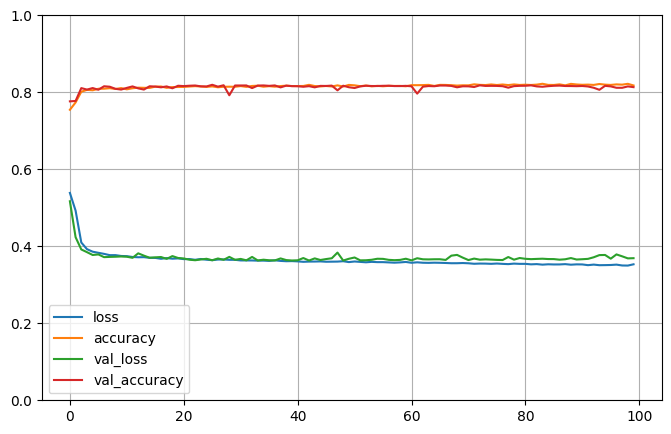

In [10]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 1s 2ms/step - loss: 0.3691 - accuracy: 0.8133


[0.3690647482872009, 0.8133466243743896]

In [12]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= model.predict_classes(X_test) )

AttributeError: ignored

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych z fróżnymi funkcjami aktywacji:
* sigmoid
* tanh
* relu
* elu
* LeakyReLU

# Zad. 
Stwórz wykres porównujący metody. 

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)

print(X_train2.shape)
X_test2.shape

(15922, 41)


(15060, 41)

In [14]:
history2 = History()
model2 = Sequential()
model2.add(Dense(100,activation="tanh",input_shape=(X_train2.shape[1],)))
model2.add(Dense(50,activation="tanh"))
model2.add(Dense(10,activation="tanh"))
model2.add(Dense(1,activation="sigmoid"))
model2.summary()
model2.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
history2 = model.fit(X_train2, y_train, validation_data= (X_test2, y_test), batch_size=32,epochs=100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4200      
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
498/498 [==============================] - 4s 6ms/step - loss: 0.3826 - accuracy: 0.8214 - val_loss: 0.3487 - val_accuracy: 0.8415
Epoch 2/100
498/498 [====================

In [15]:
history3 = History()
model3 = Sequential()
model3.add(Dense(100,activation="relu",input_shape=(X_train2.shape[1],)))
model3.add(Dense(50,activation="relu"))
model3.add(Dense(10,activation="relu"))
model3.add(Dense(1,activation="sigmoid"))
model3.summary()
model3.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
history3 = model.fit(X_train2, y_train, validation_data= (X_test2, y_test), batch_size=32,epochs=100)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               4200      
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 dense_10 (Dense)            (None, 10)                510       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
498/498 [==============================] - 2s 5ms/step - loss: 0.2223 - accuracy: 0.8925 - val_loss: 0.4563 - val_accuracy: 0.8329
Epoch 2/100
498/498 [====================

In [16]:
history4 = History()
model4 = Sequential()
model4.add(Dense(100,activation="elu",input_shape=(X_train2.shape[1],)))
model4.add(Dense(50,activation="elu"))
model4.add(Dense(10,activation="elu"))
model4.add(Dense(1,activation="sigmoid"))
model4.summary()
model4.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
history4 = model.fit(X_train2, y_train, validation_data= (X_test2, y_test), batch_size=32,epochs=100)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               4200      
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 10)                510       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
498/498 [==============================] - 2s 5ms/step - loss: 0.1816 - accuracy: 0.9094 - val_loss: 0.6568 - val_accuracy: 0.8244
Epoch 2/100
498/498 [====================

In [17]:
history5 = History()
model5 = Sequential()
model5.add(Dense(100,activation="LeakyReLU",input_shape=(X_train2.shape[1],)))
model5.add(Dense(50,activation="LeakyReLU"))
model5.add(Dense(10,activation="LeakyReLU"))
model5.add(Dense(1,activation="sigmoid"))
model5.summary()
model5.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
history5 = model.fit(X_train2, y_train, validation_data= (X_test2, y_test), batch_size=32,epochs=100)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               4200      
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                                 
 dense_18 (Dense)            (None, 10)                510       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
498/498 [==============================] - 2s 3ms/step - loss: 0.1553 - accuracy: 0.9234 - val_loss: 0.8841 - val_accuracy: 0.8205
Epoch 2/100
498/498 [====================

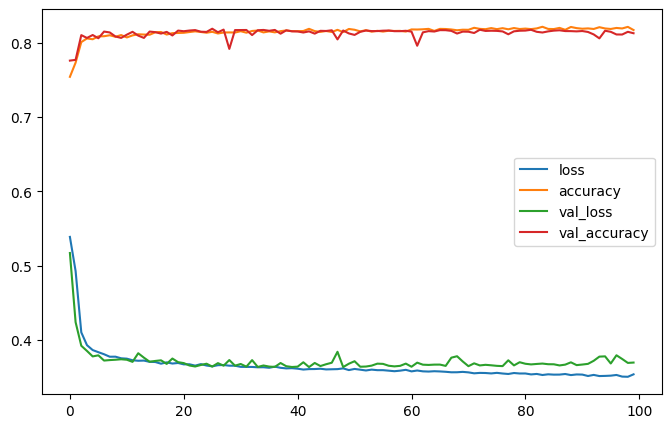

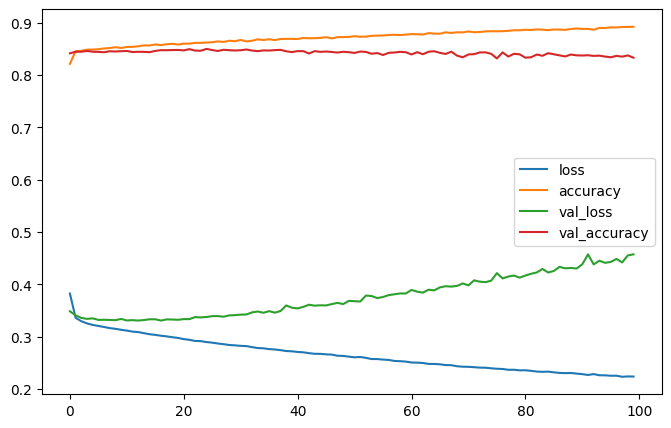

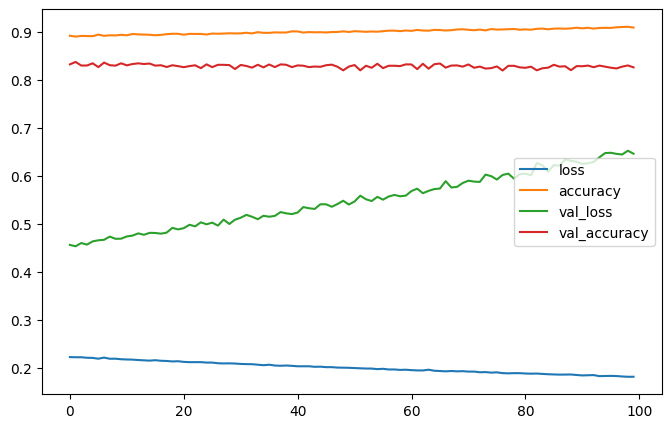

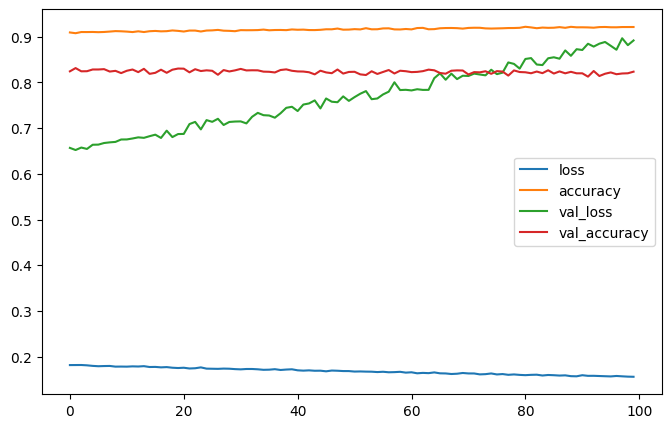

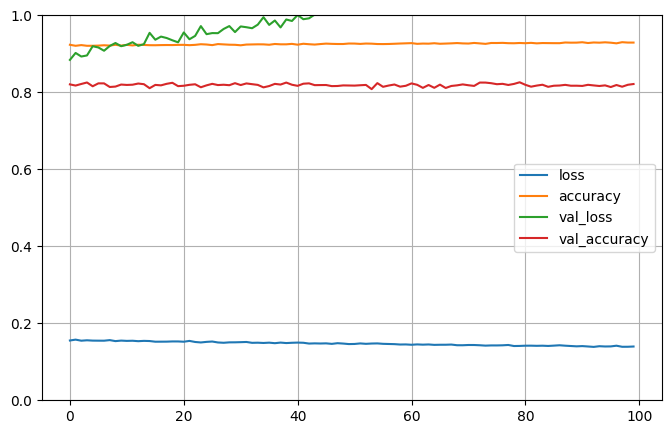

In [18]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
pd.DataFrame(history2.history).plot(figsize=(8, 5))
pd.DataFrame(history3.history).plot(figsize=(8, 5))
pd.DataFrame(history4.history).plot(figsize=(8, 5))
pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()